<a href="https://colab.research.google.com/github/pankaj18/NLP-Projects/blob/master/bbc_news_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import csv

In [41]:
stopwords=[ "a", "about", "above", "after", "again", "against", "all", "am", 
           "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", 
           "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down",
           "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", 
           "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", 
           "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", 
           "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", 
           "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", 
           "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too",
           "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", 
           "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd",
           "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]


In [42]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv \
    -O /tmp/bbc-text.csv

--2020-07-11 18:34:27--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.69.128, 108.177.119.128, 108.177.126.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.69.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5057493 (4.8M) [application/octet-stream]
Saving to: ‘/tmp/bbc-text.csv’

/tmp/bbc-text.csv   100%[===================>]   4.82M  --.-KB/s    in 0.03s   

2020-07-11 18:34:27 (158 MB/s) - ‘/tmp/bbc-text.csv’ saved [5057493/5057493]



In [43]:
sentences=[]
labels=[]
with open('/tmp/bbc-text.csv','r') as f:
  csvreader=csv.reader(f)
  #skip heading
  next(csvreader)
  for row in csvreader:
    labels.append(row[0])
    sentence=row[1]
    for word in stopwords:
      token=" "+ word + " "
      sentence = sentence.replace(token," ")
      sentence = sentence.replace("  "," ")
    sentences.append(sentence)
    

  print(len(sentences))
  print(sentences[0])
  print(labels[0])


2225
tv future hands viewers home theatre systems plasma high-definition tvs digital video recorders moving living room way people watch tv will radically different five years time. according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend programmes content will delivered viewers via home networks cable satellite telecoms companies broadband service providers front rooms portable devices. one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes like us s tivo uk s sky+ system allow people record store play pause forward wind tv programmes want. essentially technology allows much personalised tv. also built-in high-definition tv sets big business japan us slower take off europe lack high-definition programming. not can people forward wind adverts can also forget abiding network channel schedules putting together a-la-carte entertainment. us networks cable sa

In [44]:
#sentences

In [45]:
vocab_size = 10000
embedding_dim = 64
max_length = 30
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"
training_portion = .8

In [46]:
train_size = round(training_portion*len(sentences))

train_sentences = sentences[:train_size]
train_labels = labels[:train_size]

validation_sentences = sentences[train_size:]
validation_labels = labels[train_size:]

print(train_size)
print(len(train_sentences))
print(len(train_labels))
print(len(validation_sentences))
print(len(validation_labels))

# Expected output (if training_portion=.8)
# 1780
# 1780
# 1780
# 445
# 445

1780
1780
1780
445
445


In [47]:
tokenizer = Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences,maxlen=max_length,padding=padding_type,truncating=trunc_type)

print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

# Expected Ouput
# 449
# 120
# 200
# 120
# 192
# 120

449
30
200
30
192
30


In [48]:
validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences,maxlen=max_length,padding=padding_type,truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

# Expected output
# 445
# (445, 120)

445
(445, 30)


In [50]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(train_labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

# Expected output
# [4]
# [2]
# [1]
# (1780, 1)
# [5]
# [4]
# [3]
# (445, 1)

[5]
[2]
[1]
(1780, 1)
[4]
[5]
[3]
(445, 1)


In [51]:
model = tf.keras.Sequential([
# YOUR CODE HERE
tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
tf.keras.layers.GlobalAveragePooling1D(),
tf.keras.layers.Dense(24,activation='relu'),
tf.keras.layers.Dense(6,activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

# Expected Output
# Layer (type)                 Output Shape              Param #   
# =================================================================
# embedding (Embedding)        (None, 120, 16)           16000     
# _________________________________________________________________
# global_average_pooling1d (Gl (None, 16)                0         
# _________________________________________________________________
# dense (Dense)                (None, 24)                408       
# _________________________________________________________________
# dense_1 (Dense)              (None, 6)                 150       
# =================================================================
# Total params: 16,558
# Trainable params: 16,558
# Non-trainable params: 0

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 30, 64)            640000    
_________________________________________________________________
global_average_pooling1d_2 ( (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 24)                1560      
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 150       
Total params: 641,710
Trainable params: 641,710
Non-trainable params: 0
_________________________________________________________________


In [52]:
num_epochs = 30
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2)

Epoch 1/30
56/56 - 1s - loss: 1.7404 - accuracy: 0.3438 - val_loss: 1.6535 - val_accuracy: 0.3910
Epoch 2/30
56/56 - 0s - loss: 1.4635 - accuracy: 0.6348 - val_loss: 1.2815 - val_accuracy: 0.7079
Epoch 3/30
56/56 - 0s - loss: 0.9176 - accuracy: 0.9197 - val_loss: 0.7868 - val_accuracy: 0.8427
Epoch 4/30
56/56 - 0s - loss: 0.4132 - accuracy: 0.9792 - val_loss: 0.4724 - val_accuracy: 0.8944
Epoch 5/30
56/56 - 0s - loss: 0.1782 - accuracy: 0.9961 - val_loss: 0.3400 - val_accuracy: 0.9169
Epoch 6/30
56/56 - 0s - loss: 0.0894 - accuracy: 0.9994 - val_loss: 0.2838 - val_accuracy: 0.9236
Epoch 7/30
56/56 - 0s - loss: 0.0517 - accuracy: 0.9994 - val_loss: 0.2564 - val_accuracy: 0.9213
Epoch 8/30
56/56 - 0s - loss: 0.0332 - accuracy: 1.0000 - val_loss: 0.2384 - val_accuracy: 0.9191
Epoch 9/30
56/56 - 0s - loss: 0.0229 - accuracy: 1.0000 - val_loss: 0.2266 - val_accuracy: 0.9191
Epoch 10/30
56/56 - 0s - loss: 0.0168 - accuracy: 1.0000 - val_loss: 0.2179 - val_accuracy: 0.9236
Epoch 11/30
56/56 -

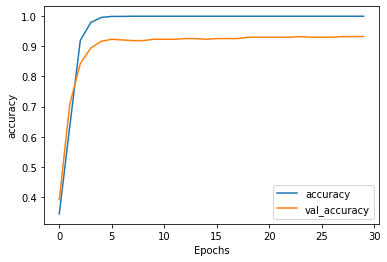

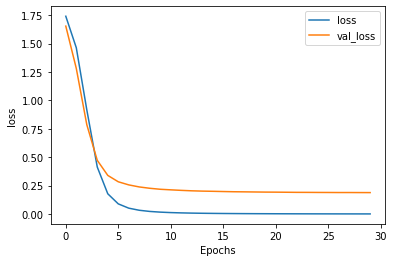

In [55]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [56]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])


In [57]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

# Expected output
# (1000, 16)

(10000, 64)


In [58]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [59]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>